In [157]:
import pandas as pd
%matplotlib inline

### Extract Data from CSV file


In [170]:
pd.set_option("display.max_colwidth", None)
vacancies = pd.read_csv("../Web Scrapping/vacancies.csv")
vacancies.head()

,Title,Location,Description,Additional Information,Views,Applications,Filtered Technologies
0,Senior Machine Learning Engineer video,"['Ukraine', 'Dnipro', 'Ivano', 'Frankivsk', 'Kyiv', '2', 'more', 'cities']","ravatar uses advanced generative artificial intelligence technology to create high quality realistic avatars.working with synthetic data, we can recreate any person in virtual reality using existing audio and video samples as a reference.https://ravatar.com/#undefinedmachine learning engineer, text-to-speech (tts) research cкоріше такий тайтл точніший.stackpython, java, c++, or c#.","['Product', 'Office or Remote', '2 years of experience', 'Intermediate']",32,3,[]
1,Python Team Lead,['Ukraine'],"we are seeking a dynamic and experienced python team lead with a strong background in gis (geographic information systems).responsibilities: as the python team lead, you will play a crucial role in overseeing and guiding the forte team's efforts. your primary responsibilities will include:•\tleading a team of skilled python developers and gis specialists in the design, development, and maintenance of geospatial data processing and analysis solutions.•\tcollaborating with cross-functional teams to gather requirements, design effective workflows, and ensure successful project delivery.•\tleveraging your gis expertise to contribute to the development and improvement of spatial data processing algorithms and methodologies.•\ttaking charge of qa processes, particularly in the validation of machine learning results using jupyter notebooks.•\tmanaging and optimizing the utilization of infrastructure resources, including on-premises servers, s3 storage buckets, and shared network drives.•\toverseeing the migration process away from google sheets for production data, utilizing the google sheets api for transitional solutions.•\tcoordinating activities using jira to ensure efficient project management and timely delivery of tasks.required skills and qualifications:•\textensive experience working with python and its libraries, particularly xarray for raster data and geopandas for vector data.•\tproficiency in core python libraries such as pygeos, shapely, pandas, and numpy.•\tstrong familiarity with qgis, specifically for shapefile extraction and manipulation.•\tprevious experience using jupyter notebooks for quality assurance and validation of machine learning outputs.•\tknowledge of google earth engine and its dependencies, managed through the gee_connector.•\texperience working with on-premises infrastructure, s3 storage buckets, and shared network drives for data storage and retrieval.•\tfamiliarity with process automation using tools like process street, particularly for defining workflows related to shapefile extraction.•\tprior exposure to the google sheets api and transitioning away from google sheets for production data management.•\tproficient english skills at an upper-intermediate level to effectively communicate and collaborate within a diverse team.we offer:• professional development and personal growth• financial opportunities that attract• remote work option• comfortable working environment• paid vacation• paid sick leave• friendly and open-minded teamif you are a passionate python developer with a knack for leading teams and a strong background in gis, we invite you to join us in our mission to revolutionize the field. apply now to embark on a journey of innovation and growth with us.","['Full Remote', '5 years of experience', 'Upper-Intermediate']",15,2,"['PANDAS', 'PYTHON']"
2,Machine Learning Engineer,"['Ukraine', 'Dnipro', 'Kyiv', 'Lviv']","machine learning engineer, text-to-speech (tts)good knowledge of python (standard and ml libraries, ability to apply oop);understanding the principles of building machine learning models;sql knowledge;experience with docker;ability to work with git;systems thinking, desire to understand the subject area, business processes;technical higher education.good knowledge of probability the

In [159]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   227 non-null    object
 1   Location                227 non-null    object
 2   Description             227 non-null    object
 3   Additional Information  227 non-null    object
 4   Views                   227 non-null    int64 
 5   Applications            227 non-null    int64 
 6   Filtered Technologies   227 non-null    object
dtypes: int64(2), object(5)
memory usage: 12.5+ KB


In [160]:
vacancies.describe()

,Views,Applications
count,227.000000,227.000000
mean,112.995595,25.696035
std,137.304857,39.160664
min,1.000000,0.000000
25%,34.500000,4.500000
50%,71.000000,13.000000
75%,138.000000,33.000000
max,1185.000000,427.000000


### Aggregating a comprehensive list of technologies listed across all vacancies and subsequently identifying the top 20 most frequently mentioned technologies.

In [161]:
from collections import Counter

all_technologies = []
for tech_list in vacancies["Filtered Technologies"]:
    tech_list = eval(tech_list)
    all_technologies.extend(tech_list)


technology_counts = Counter(all_technologies)
top_technologies = technology_counts.most_common(20)
top_technologies_df = pd.DataFrame(top_technologies, columns=['Technology', 'Count'])
top_technologies_df

,Technology,Count
0,PYTHON,186
1,AWS,57
2,DOCKER,54
3,REST,52
4,DJANGO,48
5,SQL,42
6,APIS,33
7,POSTGRESQL,32
8,FLASK,31
9,GIT,27


### Top 20 most common technologies diagram

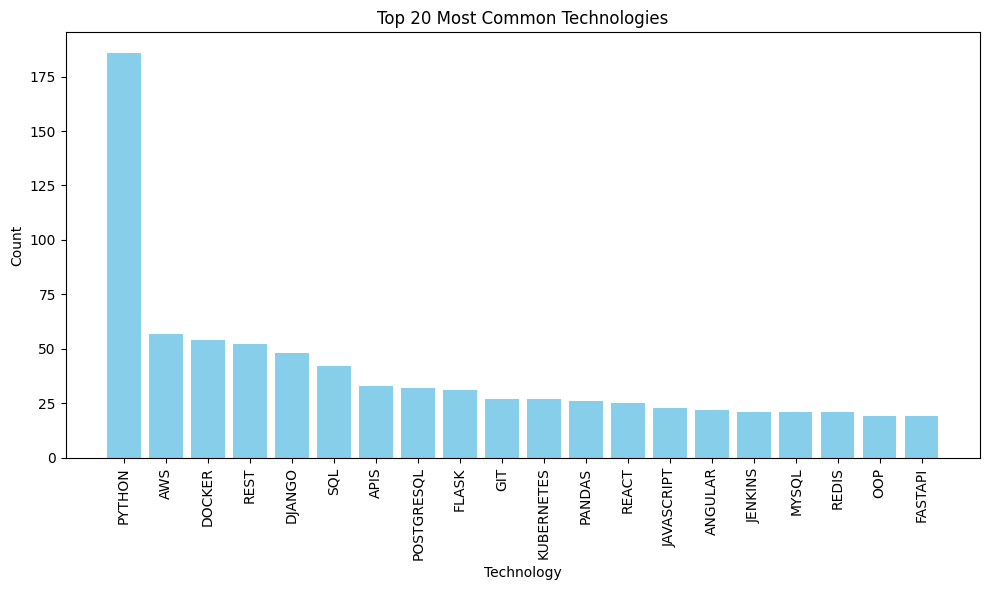

In [162]:
import matplotlib.pyplot as plt
technologies = [tech[0] for tech in top_technologies]
counts = [tech[1] for tech in top_technologies]

plt.figure(figsize=(10, 6))
plt.bar(technologies, counts, color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel('Technology')
plt.ylabel('Count')
plt.title('Top 20 Most Common Technologies')

plt.tight_layout()

### Analysis of most popular technologies for Junior Vacancy

In [163]:
junior_vacancies_df = vacancies[vacancies["Title"].str.contains(r'\bJunior\b', case=False, regex=True)]
all_technologies = []
for tech_list in junior_vacancies_df["Filtered Technologies"]:
    tech_list = eval(tech_list)
    all_technologies.extend(tech_list)

junior_technology_counts = Counter(all_technologies)
top_junior_technologies = junior_technology_counts.most_common()
top_junior_technologies_df = pd.DataFrame(top_junior_technologies, columns=['Technology', 'Count'])
top_junior_technologies_df

,Technology,Count
0,PYTHON,9
1,SQL,4
2,DJANGO,4
3,JAVASCRIPT,3
4,MYSQL,3
5,FLASK,2
6,GITHUB,2
7,GIT,2
8,REDIS,1
9,TENSORFLOW,1


### Most popular Junior technologies diagram

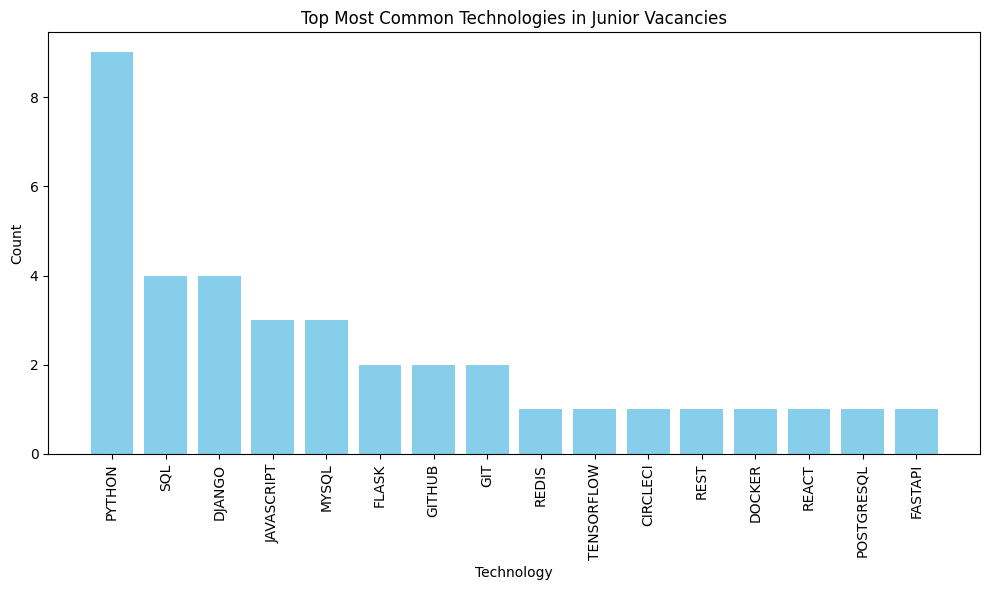

In [164]:
plt.figure(figsize=(10, 6))
plt.bar(top_junior_technologies_df['Technology'], top_junior_technologies_df['Count'], color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel('Technology')
plt.ylabel('Count')
plt.title('Top Most Common Technologies in Junior Vacancies')
plt.tight_layout()

#### Junior vacancies views and applications diagram

<Figure size 1200x800 with 0 Axes>

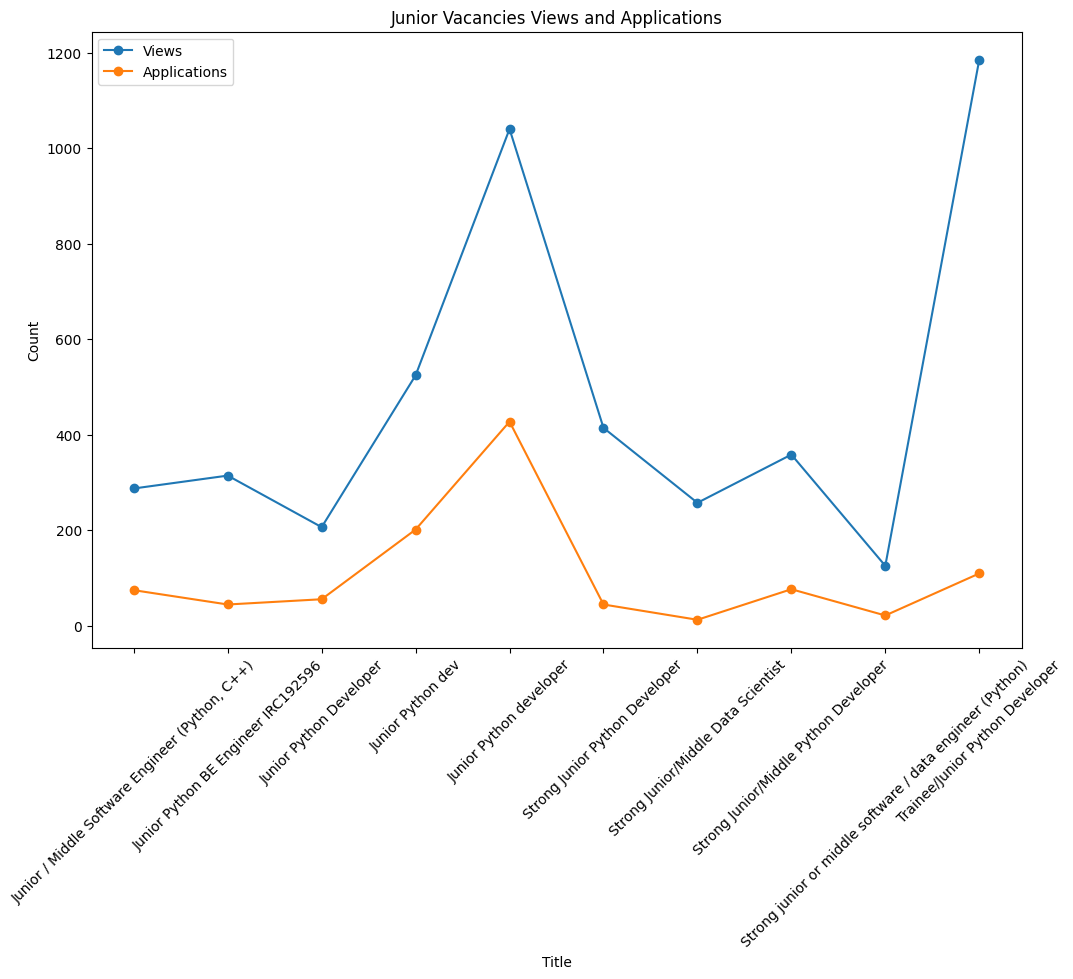

In [165]:
grouped = junior_vacancies_df.groupby("Title").agg({"Views": "sum", "Applications": "sum"})

plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 8))

plt.plot(grouped.index, grouped['Views'], marker='o', label='Views')
plt.plot(grouped.index, grouped['Applications'], marker='o', label='Applications')

plt.title('Junior Vacancies Views and Applications')
plt.xlabel('Title')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.show()

### Extracting Unique Locations and Calculating Percentages

In [166]:
all_locations = []
for location_list in vacancies["Location"]:
    location_list = eval(location_list)
    all_locations.extend(location_list)

total_locations = len(all_locations)

location_counts = Counter(all_locations)
location_counts_df = pd.DataFrame.from_dict(location_counts, orient="index", columns=["Count"])
location_counts_df.index.name = "Location"
location_counts_df["Percentage"] = (location_counts_df["Count"] / total_locations * 100)
location_counts_df

,Count,Percentage
Location,,
Ukraine,191,43.707094
Dnipro,10,2.288330
Ivano,1,0.228833
Frankivsk,1,0.228833
Kyiv,60,13.729977
2,1,0.228833
more,1,0.228833
cities,1,0.228833
Lviv,25,5.720824


### Diagram of most popular locations

(-1.0999988884047722,
 1.0999993886746615,
 -1.0999997190185888,
 1.0999999860362333)

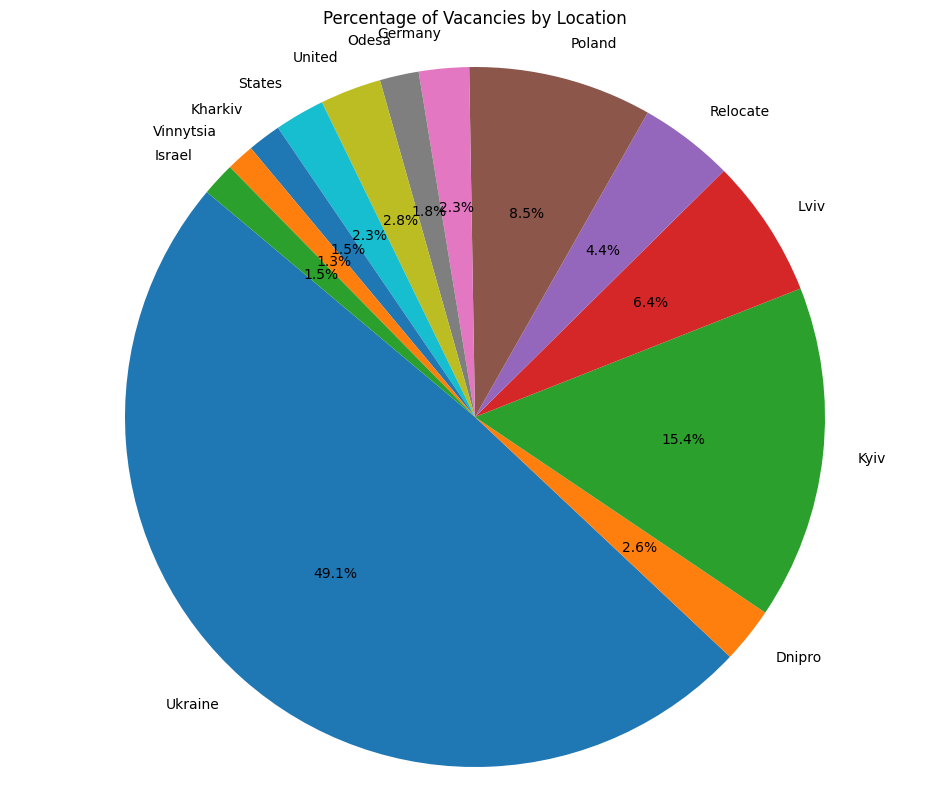

In [167]:
filtered_locations_df = location_counts_df[location_counts_df["Percentage"] > 1]

plt.figure(figsize=(12, 10))
plt.pie(filtered_locations_df["Percentage"], labels=filtered_locations_df.index, autopct='%.1f%%', startangle=140)
plt.title('Percentage of Vacancies by Location')
plt.axis('equal')

### In this analysis, we will examine the distribution of job vacancies that offer the option to work remotely or at the office.

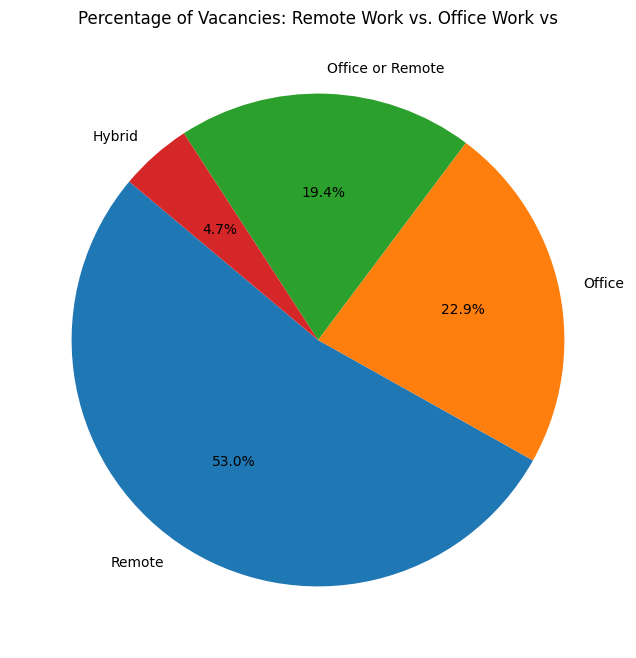

In [168]:
remote_vacancies = vacancies[vacancies["Additional Information"].str.contains('Remote', case=False)]
office_vacancies = vacancies[vacancies["Additional Information"].str.contains('Office', case=False)]
office_or_remote = vacancies[vacancies["Additional Information"].str.contains('Office or Remote', case=False)]
hybrid = vacancies[vacancies["Additional Information"].str.contains('Hybrid', case=False)]

counts = [
    remote_vacancies.shape[0],
    office_vacancies.shape[0],
    office_or_remote.shape[0],
    hybrid.shape[0]
]

labels = ['Remote', 'Office', 'Office or Remote', 'Hybrid']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Vacancies: Remote Work vs. Office Work vs")
plt.show()


### In this analysis, we will examine the distribution of job vacancies for different position

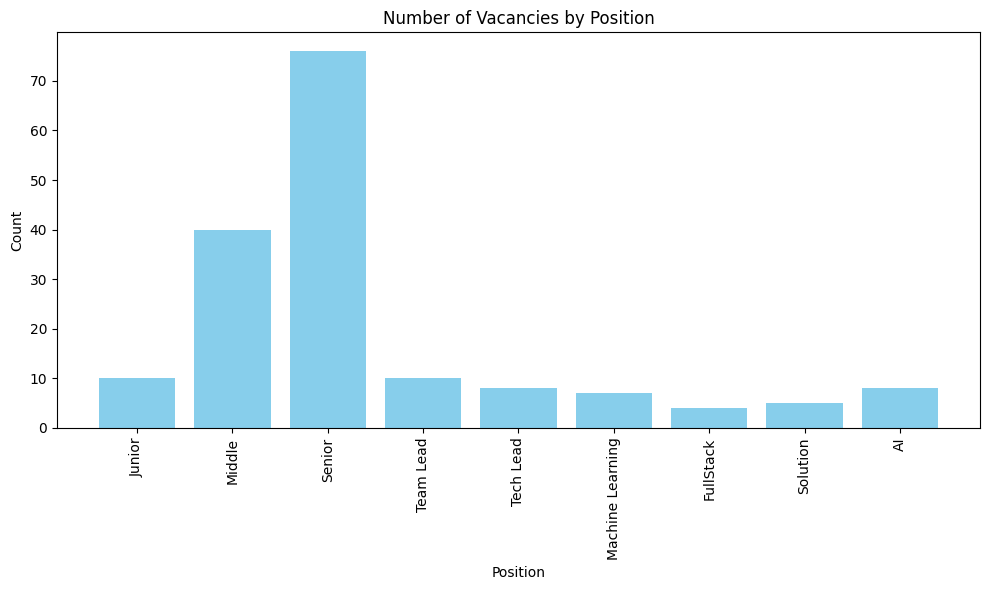

In [169]:
positions = ["Junior", "Middle", "Senior", "Team Lead", "Tech Lead", "Machine Learning", "FullStack", "Solution", "AI"]
position_counts = {position: 0 for position in positions}

for title in vacancies['Title']:
    for position in positions:
        if position in title:
            position_counts[position] += 1

position_df = pd.DataFrame.from_dict(position_counts, orient='index', columns=['Count'])

plt.figure(figsize=(10, 6))
plt.bar(position_df.index, position_df['Count'], color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Number of Vacancies by Position')
plt.tight_layout()